# Understanding the Twitter API

When in doubt, check the official documentation available at the [Developer Portal](https://developer.twitter.com/en/portal/products/academic).

_Mining the Social Web_ uses the `twitter` library, which has a different authentication setup than the current Twitter documentation suggests.

The standard twitter output is prolix, so until I figure out how to get more exact responses, or to parse those responses before they print to STDOUT, there's a fair amount of scrolling to do.

## Using `twitter`

I am going to see if the `twitter` PyPi page offers some better suggestions:

In [19]:
import twitter
import configparser

parser = configparser.RawConfigParser()   
parser.read_file(open(r'../twitKeys.py'))
apikey = parser.get('twitkeys', 'API_Key')
apisec = parser.get('twitkeys', 'API_Secret')
token = parser.get('twitkeys', 'Access_token')
token_sec = parser.get('twitkeys', 'Access_secret')

t = twitter.Twitter(auth=OAuth(token, token_sec, apikey, apisec))


In [23]:
auth = twitter.oauth.OAuth(token, token_sec, apikey, apisec)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

In [ ]:
# Once you have a connection, you can do simple things like see your own timeline:
t.statuses.home_timeline()

In [25]:
# The Yahoo! Where On Earth ID for the entire world is 1.
WORLD_WOE_ID = 1 
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization. 
# Without the underscore, the twitter package appends the ID value 
# to the URL itself as a special case keyword argument.
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) 
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [26]:
print(world_trends)
# print('\n======\n') 
# print(us_trends)

{'trends': [{'name': '#halaaşığım', 'url': 'http://twitter.com/search?q=%23halaa%C5%9F%C4%B1%C4%9F%C4%B1m', 'promoted_content': None, 'query': '%23halaa%C5%9F%C4%B1%C4%9F%C4%B1m', 'tweet_volume': 471890}, {'name': '#TURWAL', 'url': 'http://twitter.com/search?q=%23TURWAL', 'promoted_content': None, 'query': '%23TURWAL', 'tweet_volume': 10903}, {'name': 'Ramsey', 'url': 'http://twitter.com/search?q=Ramsey', 'promoted_content': None, 'query': 'Ramsey', 'tweet_volume': 14412}, {'name': 'Witzel', 'url': 'http://twitter.com/search?q=Witzel', 'promoted_content': None, 'query': 'Witzel', 'tweet_volume': 77103}, {'name': 'Putin', 'url': 'http://twitter.com/search?q=Putin', 'promoted_content': None, 'query': 'Putin', 'tweet_volume': 396759}, {'name': '#二宮和也誕生祭', 'url': 'http://twitter.com/search?q=%23%E4%BA%8C%E5%AE%AE%E5%92%8C%E4%B9%9F%E8%AA%95%E7%94%9F%E7%A5%AD', 'promoted_content': None, 'query': '%23%E4%BA%8C%E5%AE%AE%E5%92%8C%E4%B9%9F%E8%AA%95%E7%94%9F%E7%A5%AD', 'tweet_volume': 18560}, {'n

In [27]:
import json
print(json.dumps(world_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#halaa\u015f\u0131\u011f\u0131m",
    "url": "http://twitter.com/search?q=%23halaa%C5%9F%C4%B1%C4%9F%C4%B1m",
    "promoted_content": null,
    "query": "%23halaa%C5%9F%C4%B1%C4%9F%C4%B1m",
    "tweet_volume": 471890
   },
   {
    "name": "#TURWAL",
    "url": "http://twitter.com/search?q=%23TURWAL",
    "promoted_content": null,
    "query": "%23TURWAL",
    "tweet_volume": 10903
   },
   {
    "name": "Ramsey",
    "url": "http://twitter.com/search?q=Ramsey",
    "promoted_content": null,
    "query": "Ramsey",
    "tweet_volume": 14412
   },
   {
    "name": "Witzel",
    "url": "http://twitter.com/search?q=Witzel",
    "promoted_content": null,
    "query": "Witzel",
    "tweet_volume": 77103
   },
   {
    "name": "Putin",
    "url": "http://twitter.com/search?q=Putin",
    "promoted_content": null,
    "query": "Putin",
    "tweet_volume": 396759
   },
   {
    "name": "#\u4e8c\u5bae\u548c\u4e5f\u8a95\u751f\u796d",
    "url": "http://twitter.

In [28]:
world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] for trend in us_trends[0]['trends']])

common_trends = world_trends_set.intersection(us_trends_set) 

print(common_trends)

{'Tyler', 'Tupac', 'Pelicans', 'Ramsey', 'Stan Van Gundy', 'Kawhi', 'Juneteenth', 'Ben White', 'Scott Brooks', 'Putin', 'jay park'}


For more information on the Twitter search string API, see: 

https://dev.twitter.com/rest/reference/get/search/tweets

In [31]:
q = 'Putin' 
count = 100

# Import unquote to prevent URL encoding errors in next_results
from urllib.parse import unquote

search_results = twitter_api.search.tweets(q=q, count=count) 
statuses = search_results['statuses']

for _ in range(5):
    print('Length of statuses', len(statuses)) 
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
# Create a dictionary from next_results, which has the following form:
# ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_enti ties=1

    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]). split("&") ])
    search_results = twitter_api.search.tweets(**kwargs) 
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))


Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Wed Jun 16 17:45:53 +0000 2021",
 "id": 1405220095060807681,
 "id_str": "1405220095060807681",
 "text": "RT @rachelvscott: Our day started at 6am, with a Covid test ourside a hotel where Kremlin staff are staying.\n\nWe spotted protestors hanging\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "rachelvscott",
    "name": "Rachel Scott",
    "id": 88856085,
    "id_str": "88856085",
    "indices": [
     3,
     16
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,

In [70]:
with open('tweet_status.txt', 'w') as file:
    file.write(json.dumps(statuses[0], indent=1))

In [37]:
print(statuses[0]['id'])

1405220095060807681


In [38]:
print(statuses[0]['text'])

RT @rachelvscott: Our day started at 6am, with a Covid test ourside a hotel where Kremlin staff are staying.

We spotted protestors hanging…


In [40]:
statuses[0]['entities']

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'rachelvscott',
   'name': 'Rachel Scott',
   'id': 88856085,
   'id_str': '88856085',
   'indices': [3, 16]}],
 'urls': []}

In [44]:
print(f"This tweet has been favorited {statuses[0]['favorite_count']} times \
and retweeted {statuses[0]['retweet_count']} times.")

This tweet has been favorited 0 times and retweeted 37 times.


In [51]:
# And I expect this to return a yes/no (or T/F):
statuses[0]['retweeted']

False

In [52]:
status_texts = [ status['text'] for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                for status in statuses 
                    for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text']
            for status in statuses
                for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w
        for t in status_texts
            for w in t.split() ]

# Explore the first 5 items for each...
print(json.dumps(status_texts[0:5], indent=1)) 
print(json.dumps(screen_names[0:5], indent=1)) 
print(json.dumps(hashtags[0:5], indent=1)) 
print(json.dumps(words[0:5], indent=1))


[
 "RT @rachelvscott: Our day started at 6am, with a Covid test ourside a hotel where Kremlin staff are staying.\n\nWe spotted protestors hanging\u2026",
 "RT @StevenBeschloss: When Republicans root for Putin over Biden, they are telling us what they think of democracy.",
 "RT @NatashaBertrand: POTUS reiterates that there is no substitute for face-to-face meetings, and says he told Putin \"my agenda is not again\u2026",
 "@JoJoFromJerz I was thinking that today, it's nice to see an American president who doesn't look like a whipped dog\u2026 https://t.co/wh4AyrUQq7",
 "@Breaking911 PUTIN DOESNT GIVE A FUCK YOU TOOL !!!!"
]
[
 "rachelvscott",
 "StevenBeschloss",
 "NatashaBertrand",
 "JoJoFromJerz",
 "Breaking911"
]
[
 "Putin",
 "Trump",
 "MSM",
 "Breaking",
 "Biden"
]
[
 "RT",
 "@rachelvscott:",
 "Our",
 "day",
 "started"
]


Here's the code _Mining the Social Web_ offers:

```python
from collections import Counter

for item in [words, screen_names, hashtags]: 
    c = Counter(item) 
    print(c.most_common()[:10]) # top 10 
    print()
```

It strikes me that instead of using counters and then porting the data above into something more readable using `prettytable`, we should just use `pandas.` Now I just need to read up on how to do that …


In [63]:
print([word.lower() for word in words[0:10]])

['rt', '@rachelvscott:', 'our', 'day', 'started', 'at', '6am,', 'with', 'a', 'covid']


In [59]:
import pandas as pd

In [60]:
series = pd.Series(word.lower() for word in words)


In [67]:
counts = series.value_counts()
counts.head(10)

rt           488
putin        377
the          326
biden        255
to           222
is           179
of           175
president    168
and          159
a            154
dtype: int64

In [79]:
%matplotlib inline
figsize(12, 6)

<AxesSubplot:>

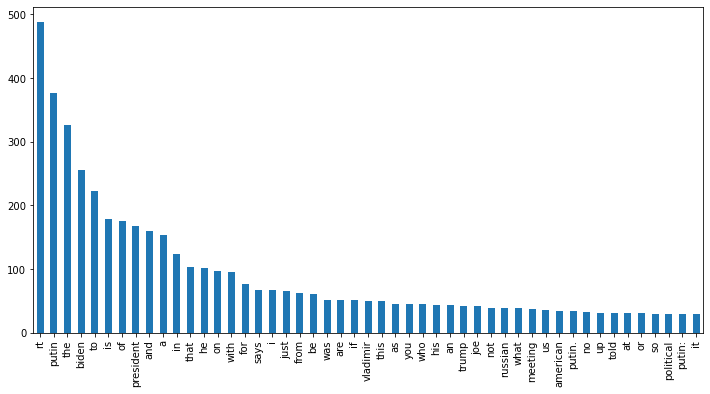

In [80]:
counts.iloc[0:49].plot(kind='bar')

In [68]:
tags = pd.Series(tag.lower() for tag in hashtags)
tag_count = tags.value_counts()
tag_count.head(10)

putin               10
russia               7
biden                6
breaking             4
usa                  3
russian              2
bidenputinsummit     2
breakingnews         2
trump                2
ahora                2
dtype: int64

In [73]:
retweets = [
     # Store out a tuple of these three values...
    (status['retweet_count'], 
    status['retweeted_status']['user']['screen_name'], 
    status['text'])
    
    # ... for each status...
    for status in statuses

    # ... so long as the status meets this condition
        if 'retweeted_status' in status.keys() ]

# print(retweets[0])
        

(37, 'rachelvscott', 'RT @rachelvscott: Our day started at 6am, with a Covid test ourside a hotel where Kremlin staff are staying.\n\nWe spotted protestors hanging…')


In [78]:
columns = ['count', 'username', 'text']
df = pd.DataFrame(retweets, columns = columns)
df.head(10)

,count,username,text
0,37,rachelvscott,"RT @rachelvscott: Our day started at 6am, with..."
1,1693,StevenBeschloss,RT @StevenBeschloss: When Republicans root for...
2,115,NatashaBertrand,RT @NatashaBertrand: POTUS reiterates that the...
3,41,zei_squirrel,RT @zei_squirrel: if you're a US journalist wh...
4,36,mmpadellan,"RT @mmpadellan: Boy, the GOP flag-wavers on th..."
5,702,RichardGrenell,RT @RichardGrenell: Putin is using the Democra...
6,87,richardhine,RT @richardhine: Republicans will still be tal...
7,837,mehdirhasan,RT @mehdirhasan: Random fact of the day: Vladi...
8,1522,RichardGrenell,RT @RichardGrenell: Guess who brought flash ca...
9,837,mehdirhasan,RT @mehdirhasan: Random fact of the day: Vladi...
